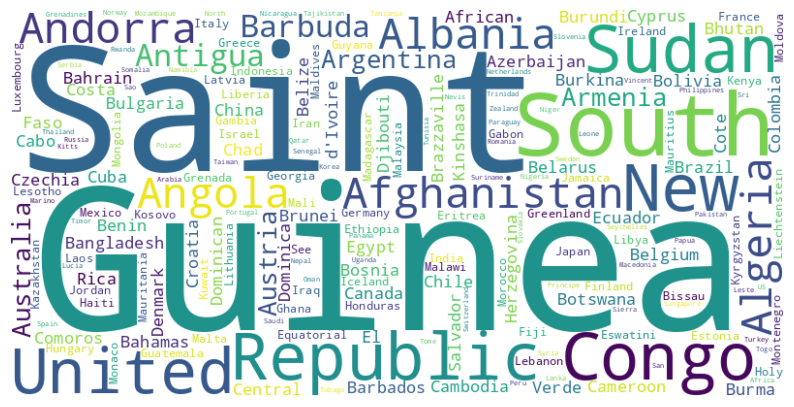

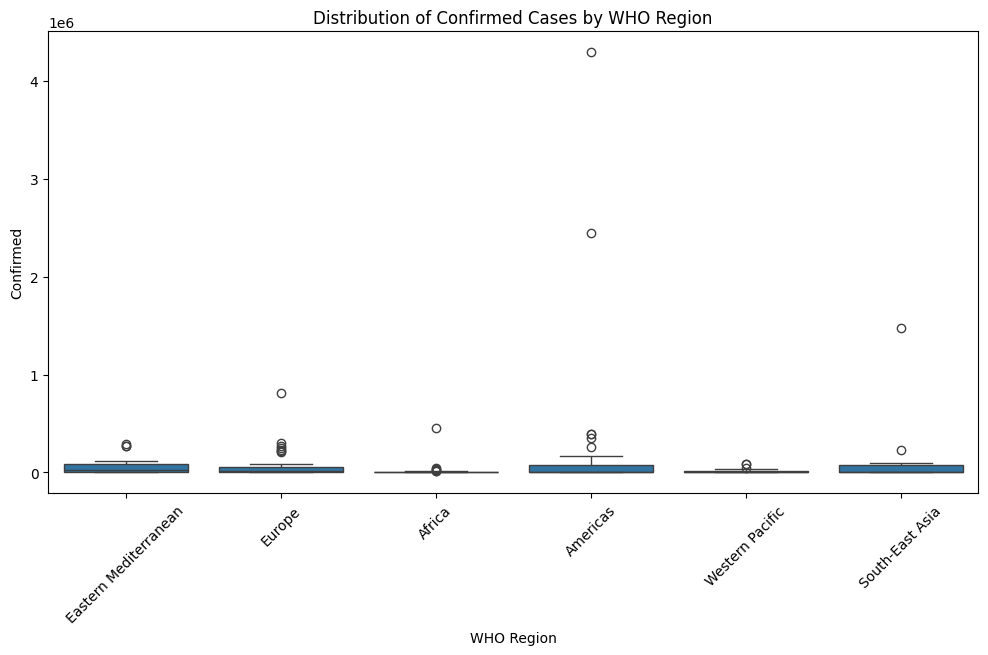

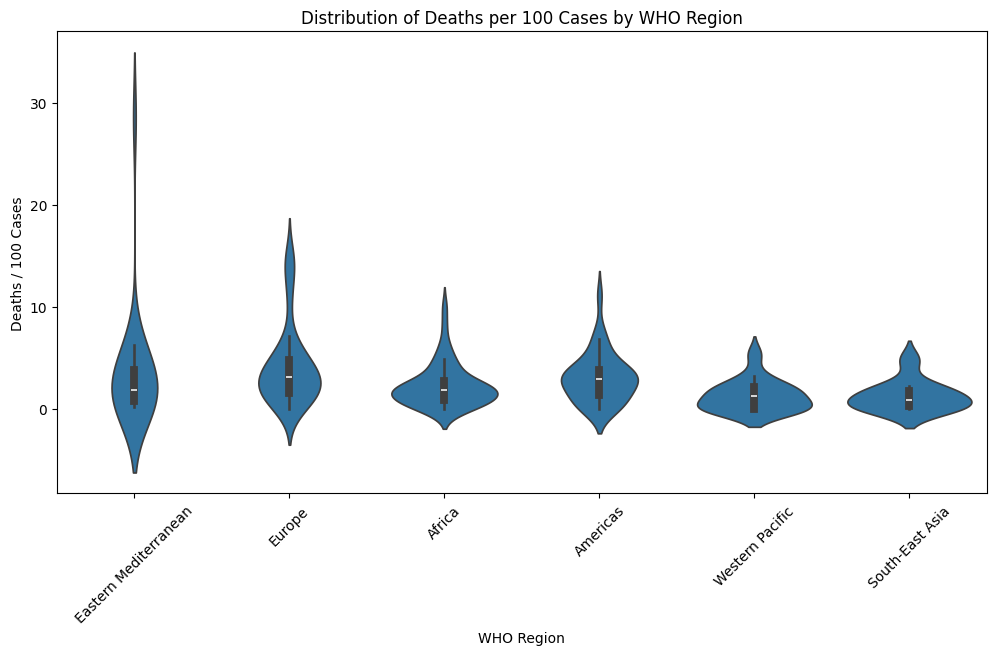

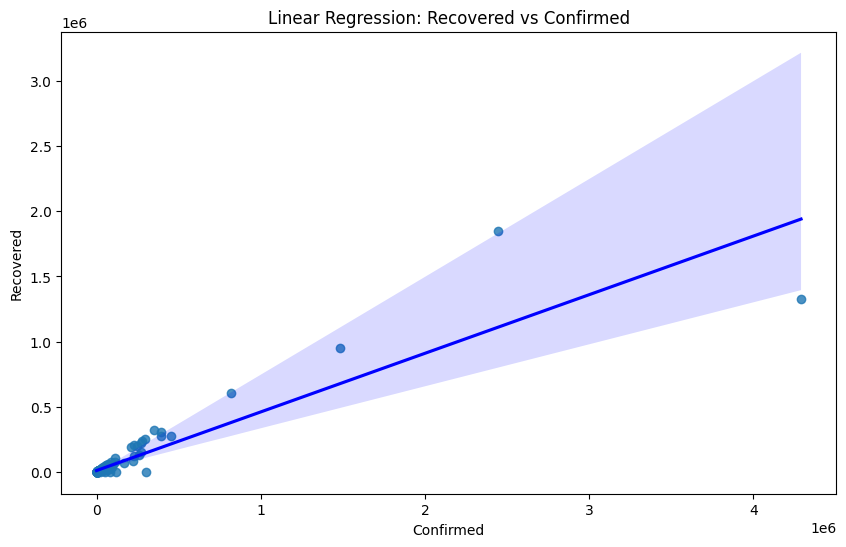

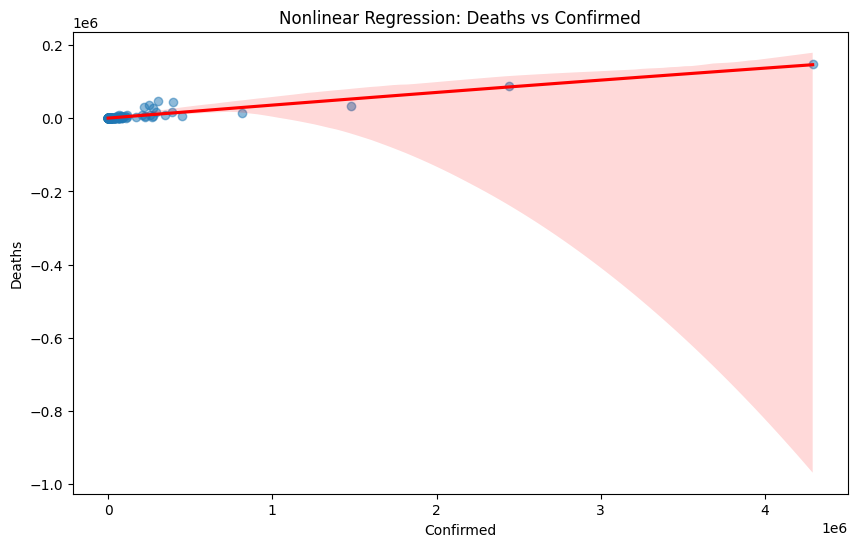

<ipython-input-6-59b90b135f64>:56: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




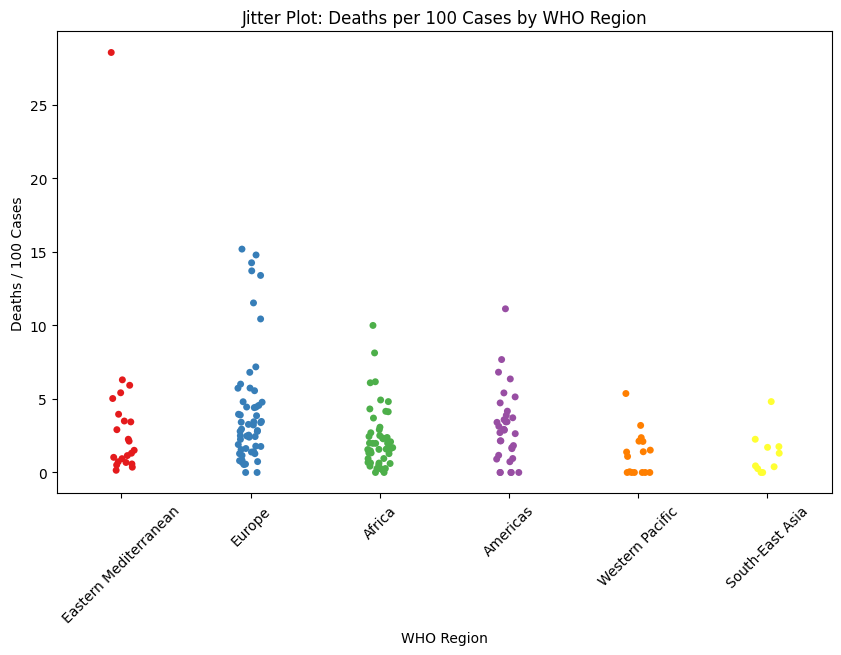

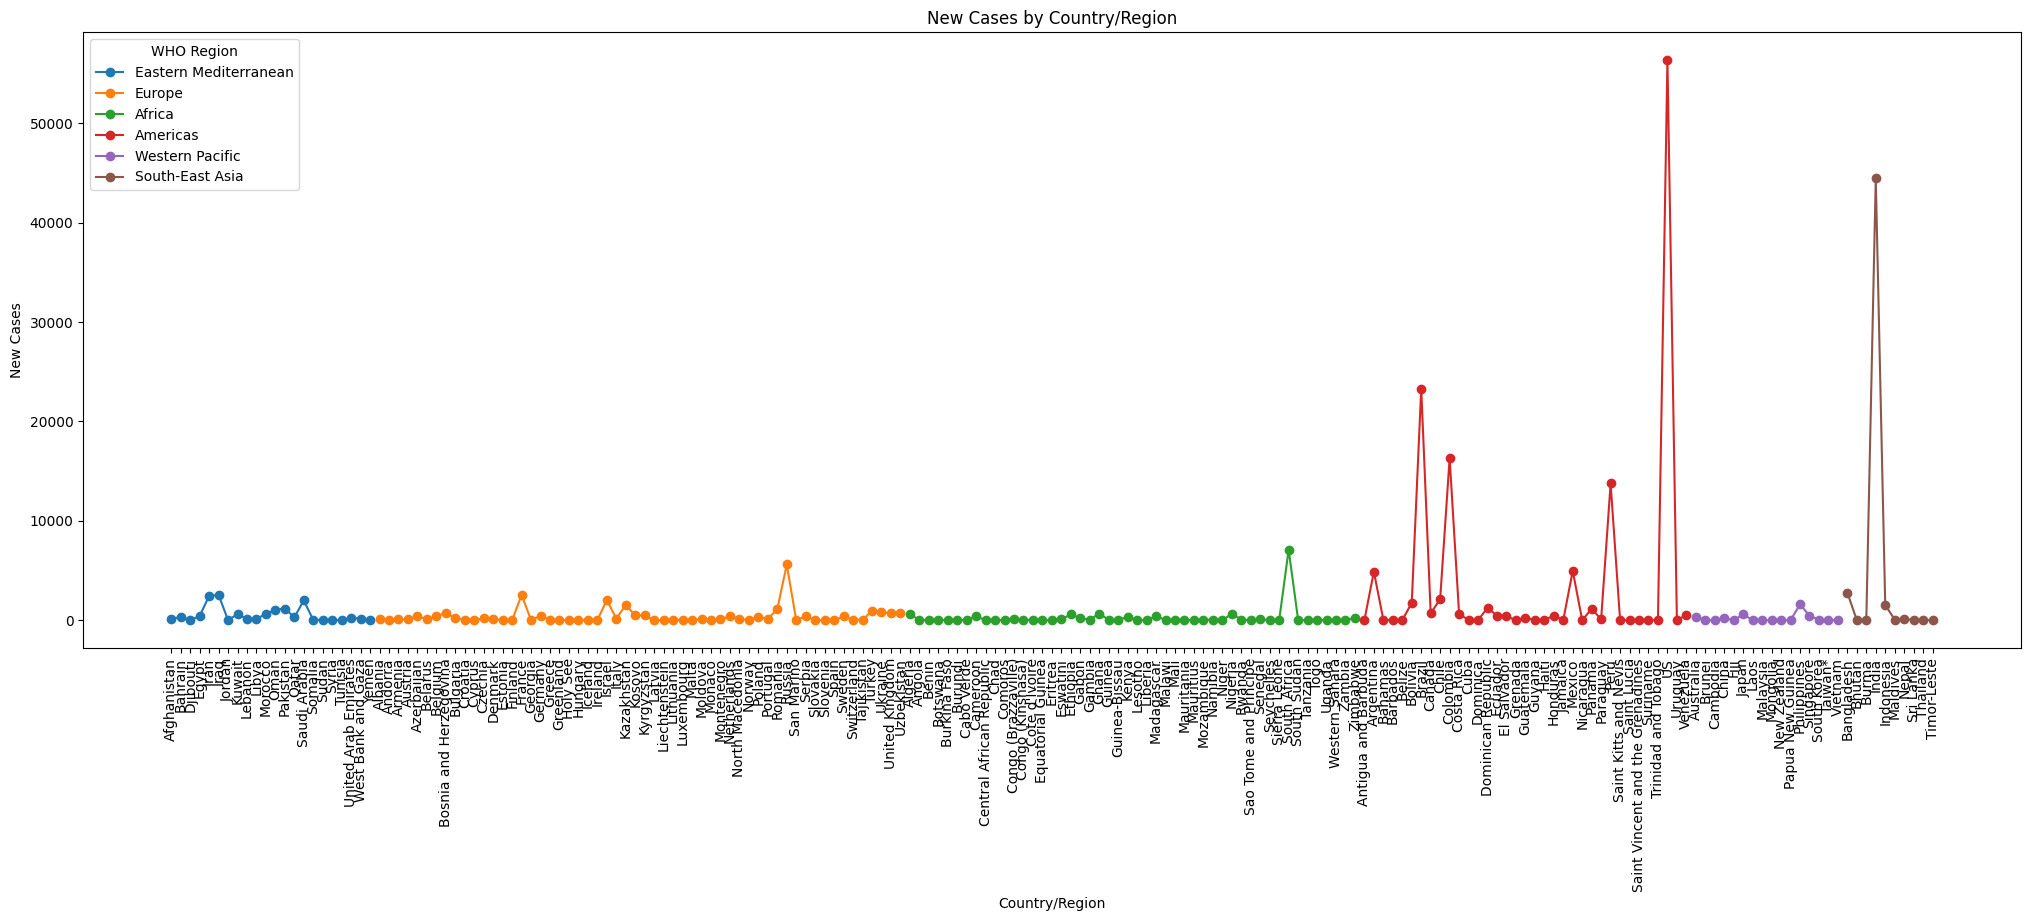

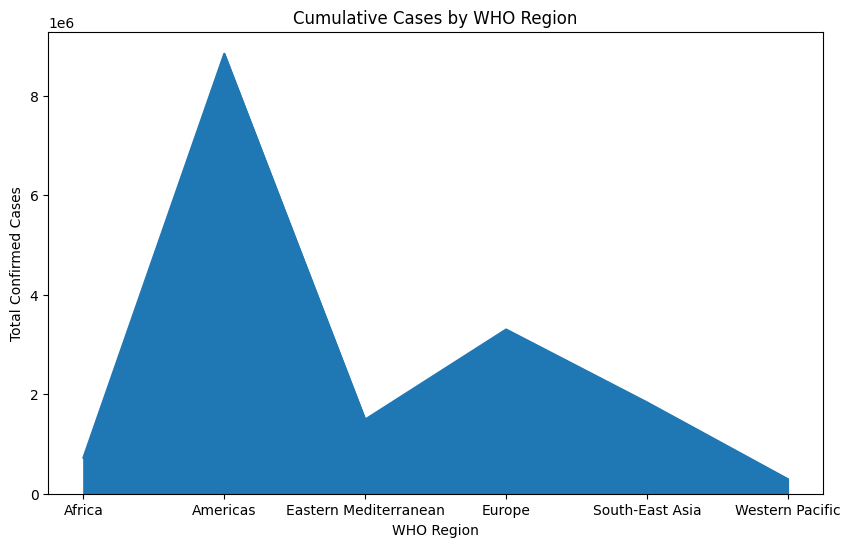

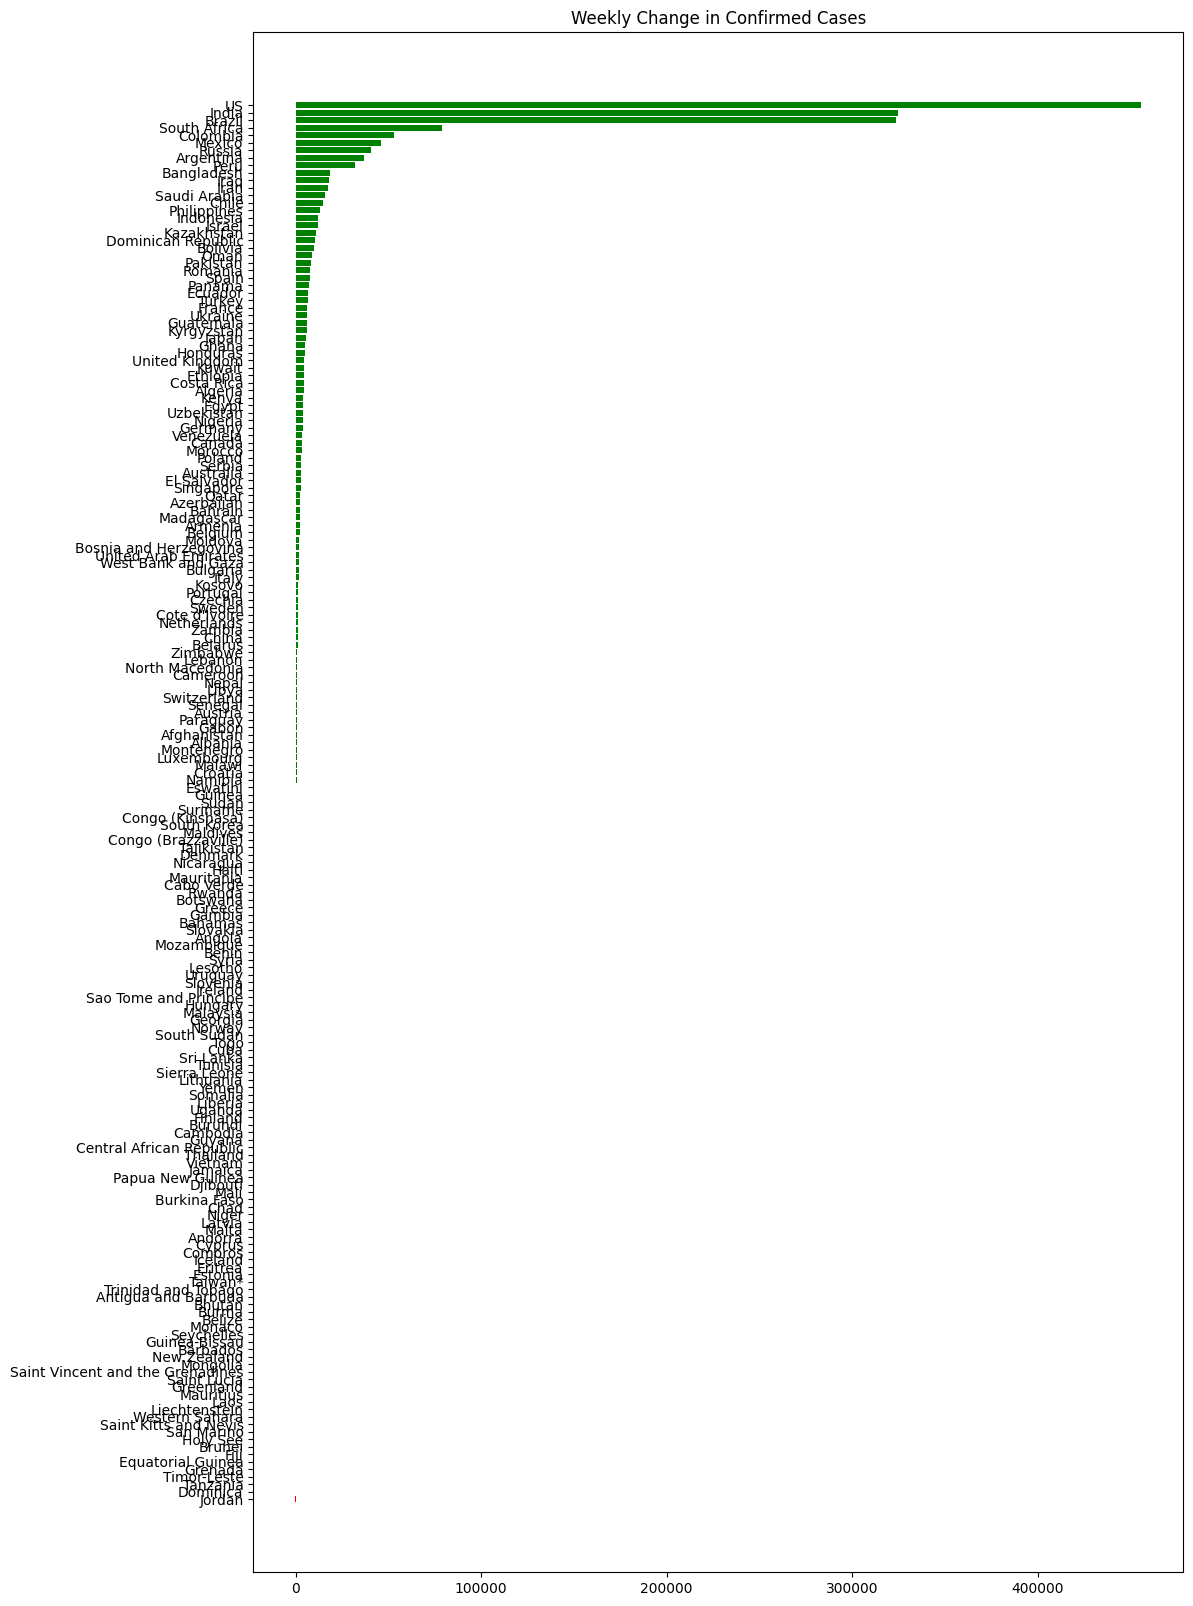

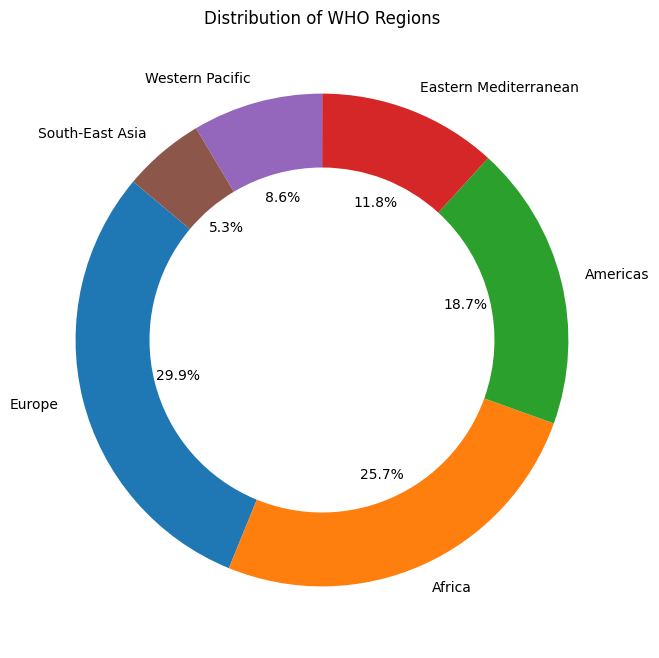

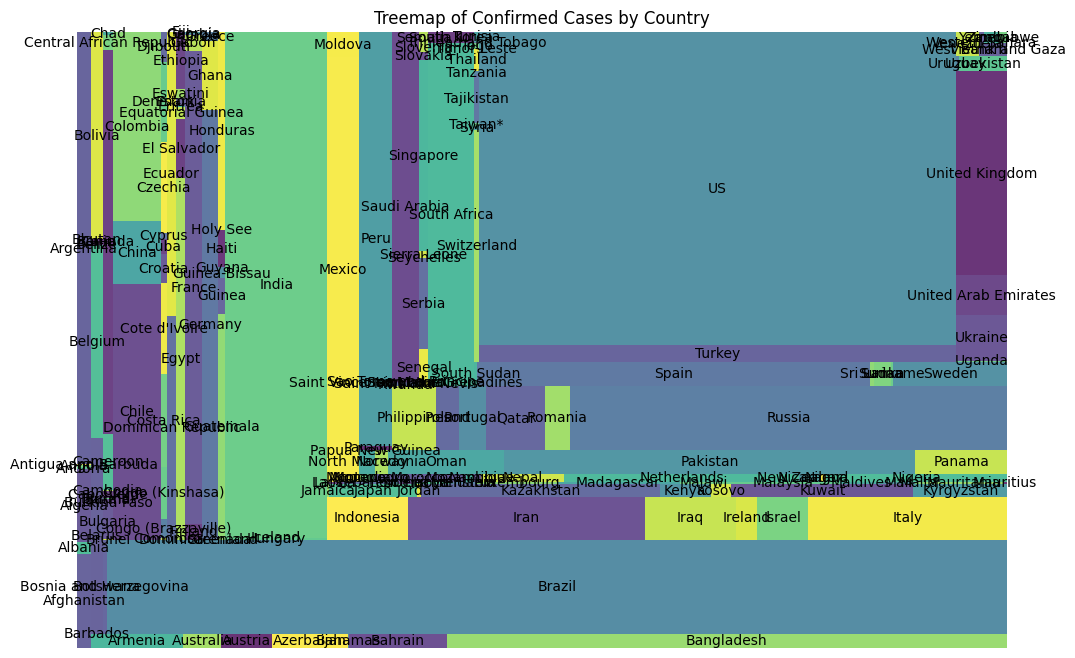

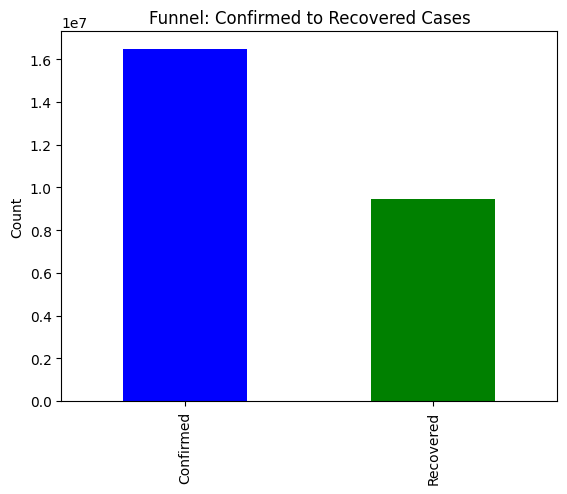

In [6]:
!pip install pandas matplotlib seaborn plotly wordcloud squarify

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import squarify

file_path = '/content/country_wise_latest.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# 1. Word Chart - Visualizing the frequency of countries
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Country/Region']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 2. Box and Whisker Plot - Distribution of Confirmed cases across regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='WHO Region', y='Confirmed', data=df)
plt.title('Distribution of Confirmed Cases by WHO Region')
plt.xticks(rotation=45)
plt.show()

# 3. Violin Plot - Distribution of Deaths per 100 Cases across regions
plt.figure(figsize=(12, 6))
sns.violinplot(x='WHO Region', y='Deaths / 100 Cases', data=df)
plt.title('Distribution of Deaths per 100 Cases by WHO Region')
plt.xticks(rotation=45)
plt.show()

# 4. Regression Plot (Linear) - Recovered vs Confirmed
plt.figure(figsize=(10, 6))
sns.regplot(x='Confirmed', y='Recovered', data=df, line_kws={'color': 'blue'})
plt.title('Linear Regression: Recovered vs Confirmed')
plt.show()

# 5. Regression Plot (Nonlinear) - Deaths vs Confirmed
plt.figure(figsize=(10, 6))
sns.regplot(x='Confirmed', y='Deaths', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5}, order=2)
plt.title('Nonlinear Regression: Deaths vs Confirmed')
plt.show()

# 6. 3D Chart - Confirmed, Deaths, and Recovered
fig = px.scatter_3d(df, x='Confirmed', y='Deaths', z='Recovered', color='WHO Region', size='Confirmed', hover_name='Country/Region')
fig.update_layout(title='3D Scatter Plot: Confirmed vs Deaths vs Recovered', width=800, height=600)
fig.show()

# 7. Jitter Plot - Deaths / 100 Cases with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x='WHO Region', y='Deaths / 100 Cases', data=df, jitter=True, palette='Set1')
plt.title('Jitter Plot: Deaths per 100 Cases by WHO Region')
plt.xticks(rotation=45)
plt.show()

# 8. Line Plot - New Cases for each Country/Region
plt.figure(figsize=(25, 8))
for region in df['WHO Region'].unique():
    subset = df[df['WHO Region'] == region]
    plt.plot(subset['Country/Region'], subset['New cases'], marker='o', label=region)

plt.title('New Cases by Country/Region')
plt.xlabel('Country/Region')
plt.ylabel('New Cases')
plt.xticks(rotation=90)
plt.legend(title='WHO Region')
plt.show()


# 9. Area Plot - Cumulative cases by WHO Region
df.groupby('WHO Region')['Confirmed'].sum().plot(kind='area', figsize=(10, 6), stacked=True)
plt.title('Cumulative Cases by WHO Region')
plt.ylabel('Total Confirmed Cases')
plt.show()

# 10. Waterfall Chart - Weekly change in Confirmed cases
weekly_change = df.groupby('Country/Region')['1 week change'].sum().sort_values()
plt.figure(figsize=(12, 20))
plt.barh(weekly_change.index, weekly_change.values, color=(weekly_change > 0).map({True: 'green', False: 'red'}))
plt.title('Weekly Change in Confirmed Cases')
plt.show()

# 11. Donut Chart - Distribution of WHO Regions
plt.figure(figsize=(8, 8))
region_counts = df['WHO Region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of WHO Regions')
plt.show()

# 12. Treemap - Country-wise confirmed cases
plt.figure(figsize=(12, 8))
squarify.plot(sizes=df['Confirmed'], label=df['Country/Region'], alpha=.8)
plt.title('Treemap of Confirmed Cases by Country')
plt.axis('off')
plt.show()

# 13. Funnel Plot - Simplified using bar chart for stages (Example: Confirmed to Recovered)
funnel_data = df[['Confirmed', 'Recovered']].sum()
funnel_data.plot(kind='bar', color=['blue', 'green'])
plt.title('Funnel: Confirmed to Recovered Cases')
plt.ylabel('Count')
plt.show()

# Observations:
# 1. Word Chart: The most mentioned country is Guinea.
# 2. Box Plot: There's a wide distribution of confirmed cases in different WHO regions.
# 3. Violin Plot: Deaths per 100 cases show high variability across regions.
# 4. Linear Regression: There's a strong correlation between confirmed and recovered cases.
# 5. Nonlinear Regression: The relationship between confirmed and deaths cases shows that there is high correlation between the two.
# 6. 3D Chart: The 3D scatter plot indicates that America lies in the higher cases region among the countries.
# 7. Jitter Plot: The deaths per 100 cases are spread out closely in some regions while scattered in others.
# 8. Line Plot: Shows high number of cases in America and India compared to other countries
# 9. Area Plot: The WHO regions with the highest cumulative cases are America and Europe.
# 10. Waterfall Chart: Made through bar chart: Shows decreasing total confirmed cases country wise.
# 11. Donut Chart: The WHO region with the most confirmed cases countries is Africa and Europe.
# 12. Treemap: The countries with the highest confirmed cases are Brazil and US.
# 13. Funnel Plot: A portion of confirmed cases have recovered.

